In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, normaltest

fight_data = pd.read_csv('fight_data_cleaned.csv')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y')

fight_data['date'] = fight_data['date'].apply(parse_date) # Convert to datetime
fight_data.dropna(subset=['date'], inplace=True) # Drop rows with invalid dates
fight_data['year'] = fight_data['date'].dt.year

fighters = fight_data[['R_fighter', 'B_fighter', 'R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs', 'year']].copy()
R_fighters = fighters[['R_fighter', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'year']]
B_fighters = fighters[['B_fighter', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'year']]
R_fighters.columns = ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'year']
B_fighters.columns = ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'year']


combined_fighters = pd.concat([R_fighters, B_fighters], ignore_index=True)
combined_fighters = combined_fighters.drop_duplicates()

In [28]:
mean_values_by_year = pd.DataFrame()
mean_values_by_year['Height_cms_mean'] = combined_fighters.groupby('year')['Height_cms'].mean()
mean_values_by_year['Weight_lbs_mean'] = combined_fighters.groupby('year')['Weight_lbs'].mean()
mean_values_by_year['Reach_cms_mean'] = combined_fighters.groupby('year')['Reach_cms'].mean()
mean_values_by_year['#Fighter_in_the_year'] = combined_fighters.groupby('year')['fighter'].nunique()

In [29]:
mean_values_by_year

,Height_cms_mean,Weight_lbs_mean,Reach_cms_mean,#Fighter_in_the_year
year,,,,
2010,181.866008,181.916996,186.665929,253
2011,179.503294,171.082353,184.255059,339
2012,178.946667,168.251969,183.493281,381
2013,178.909095,167.513575,183.564842,442
2014,177.600429,162.100000,181.553589,559
2015,177.388592,162.507042,181.462606,568
2016,177.850800,164.300000,181.984909,550
2017,177.292000,162.669811,181.473245,530
2018,177.176140,160.915789,181.591702,568


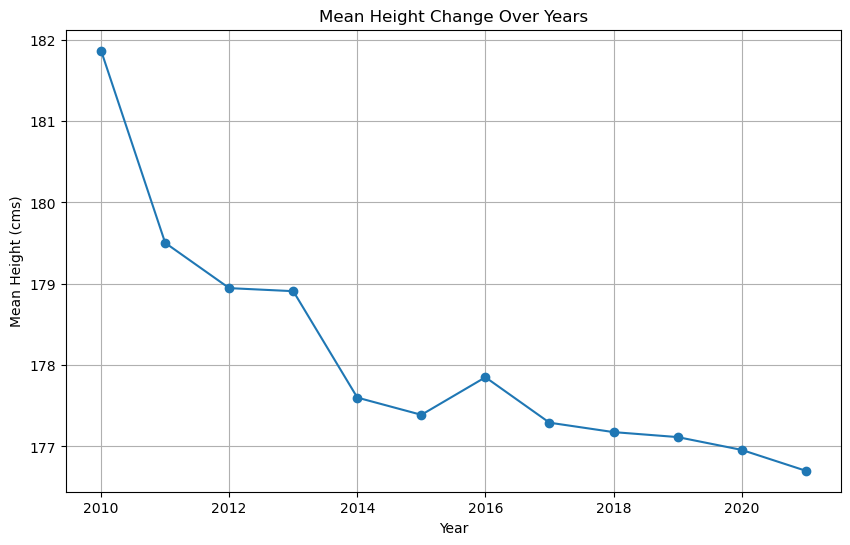

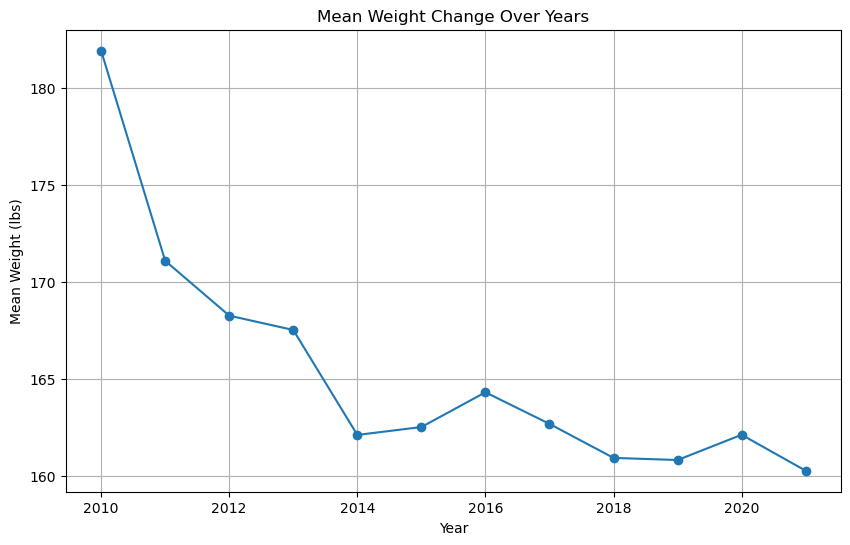

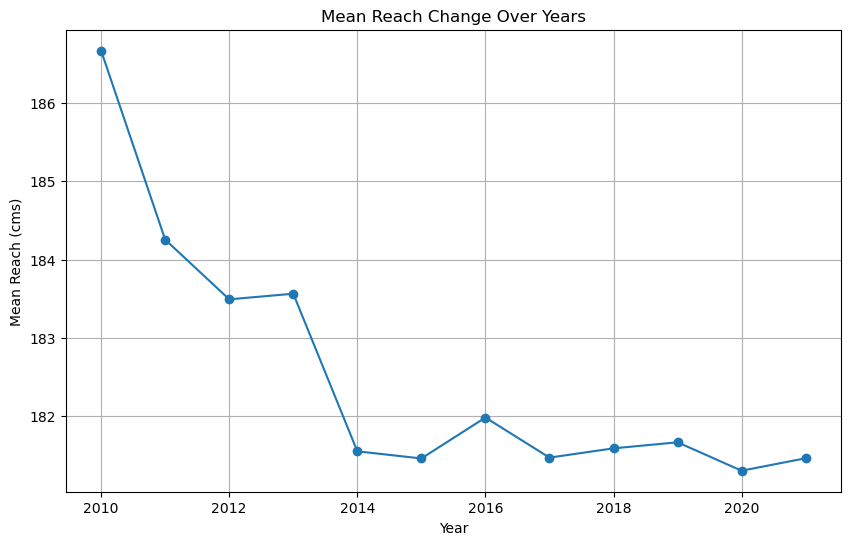

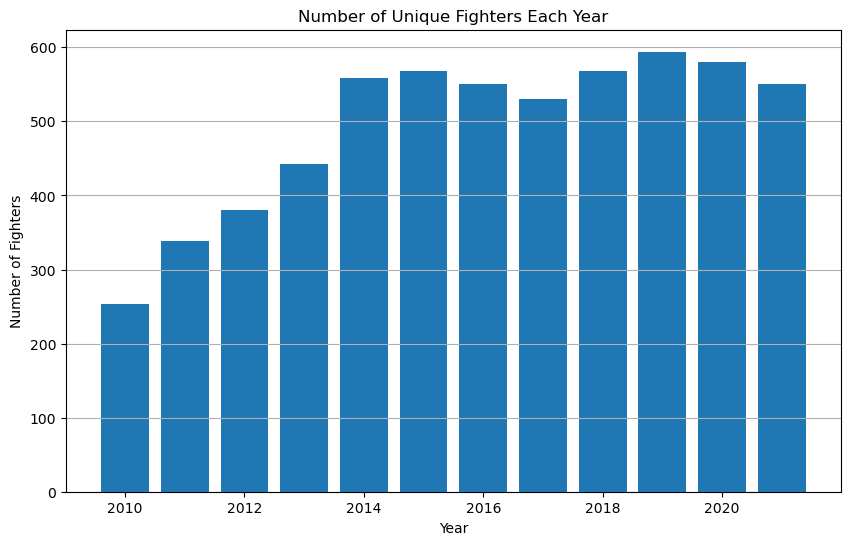

In [30]:
# Plot Height
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Height_cms_mean'], marker='o', linestyle='-')
plt.title('Mean Height Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Height (cms)')
plt.grid(True)
plt.show()

# Plot Weight
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Weight_lbs_mean'], marker='o', linestyle='-')
plt.title('Mean Weight Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Weight (lbs)')
plt.grid(True)
plt.show()

# Plot Reach
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Reach_cms_mean'], marker='o', linestyle='-')
plt.title('Mean Reach Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Reach (cms)')
plt.grid(True)
plt.show()

# Plot Number of Fighters
plt.figure(figsize=(10, 6))
plt.bar(mean_values_by_year.index, mean_values_by_year['#Fighter_in_the_year'])
plt.title('Number of Unique Fighters Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Fighters')
plt.grid(axis='y')
plt.show()


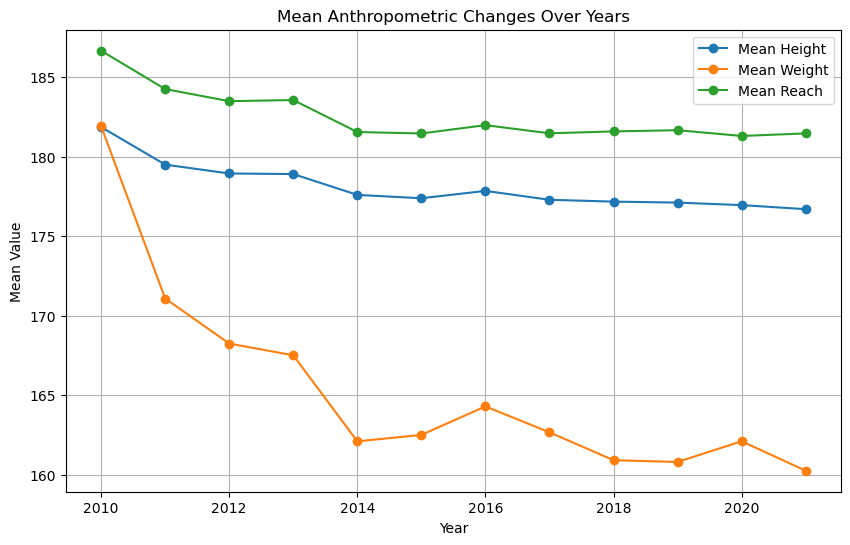

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_values_by_year.index, mean_values_by_year['Height_cms_mean'], marker='o', linestyle='-', label='Mean Height')
ax.plot(mean_values_by_year.index, mean_values_by_year['Weight_lbs_mean'], marker='o', linestyle='-', label='Mean Weight')
ax.plot(mean_values_by_year.index, mean_values_by_year['Reach_cms_mean'], marker='o', linestyle='-', label='Mean Reach')
ax.set_title('Mean Anthropometric Changes Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.grid(True)
ax.legend()

plt.show()


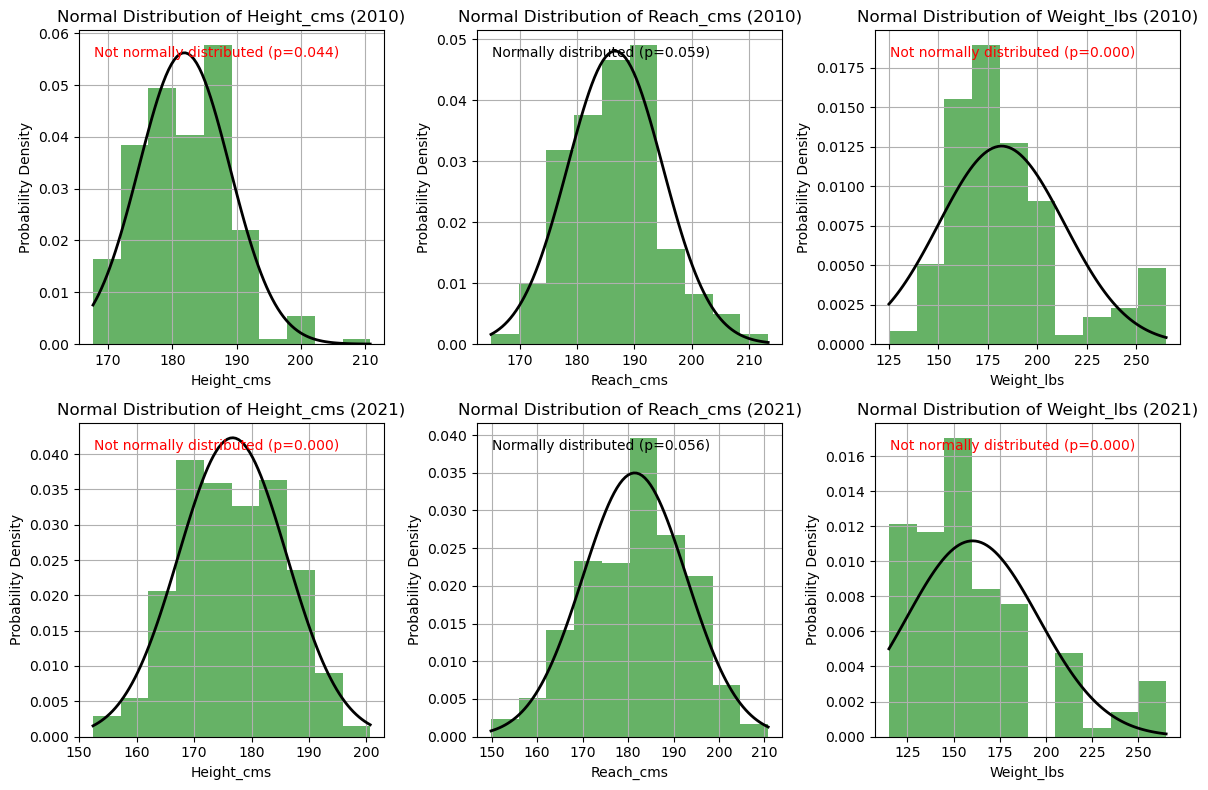

In [32]:
fighters_2010 = combined_fighters.loc[combined_fighters['year'] == 2010, ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs']]
fighters_2021 = combined_fighters.loc[combined_fighters['year'] == 2021, ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs']]



plt.figure(figsize=(12, 8))

for idx, feature in enumerate(['Height_cms', 'Reach_cms', 'Weight_lbs'], start=1):
    plt.subplot(2, 3, idx)
    data_2010 = fighters_2010[feature]
    mu_2010, std_2010 = data_2010.mean(), data_2010.std()
    xmin_2010, xmax_2010 = data_2010.min(), data_2010.max()
    x_2010 = np.linspace(xmin_2010, xmax_2010, 100)
    p_2010 = norm.pdf(x_2010, mu_2010, std_2010)
    plt.plot(x_2010, p_2010, 'k', linewidth=2)
    plt.hist(data_2010, bins=10, density=True, alpha=0.6, color='g')
    plt.title(f'Normal Distribution of {feature} (2010)')
    plt.xlabel(feature)
    plt.ylabel('Probability Density')
    plt.grid(True)

    stat_2010, p_value_2010 = normaltest(data_2010)
    if p_value_2010 > 0.05:
        plt.text(0.05, 0.95, 'Normally distributed (p={:.3f})'.format(p_value_2010), transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    else:
        plt.text(0.05, 0.95, 'Not normally distributed (p={:.3f})'.format(p_value_2010), transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='red')

for idx, feature in enumerate(['Height_cms', 'Reach_cms', 'Weight_lbs'], start=4):
    plt.subplot(2, 3, idx)
    data_2021 = fighters_2021[feature]
    mu_2021, std_2021 = data_2021.mean(), data_2021.std()
    xmin_2021, xmax_2021 = data_2021.min(), data_2021.max()
    x_2021 = np.linspace(xmin_2021, xmax_2021, 100)
    p_2021 = norm.pdf(x_2021, mu_2021, std_2021)
    plt.plot(x_2021, p_2021, 'k', linewidth=2)
    plt.hist(data_2021, bins=10, density=True, alpha=0.6, color='g')
    plt.title(f'Normal Distribution of {feature} (2021)')
    plt.xlabel(feature)
    plt.ylabel('Probability Density')
    plt.grid(True)

    stat_2021, p_value_2021 = normaltest(data_2021)
    if p_value_2021 > 0.05:
        plt.text(0.05, 0.95, 'Normally distributed (p={:.3f})'.format(p_value_2021), transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    else:
        plt.text(0.05, 0.95, 'Not normally distributed (p={:.3f})'.format(p_value_2021), transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='red')

plt.tight_layout()
plt.show()
